In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [11]:
from sklearn.datasets import load_digits

mnist = load_digits()

In [12]:
X = mnist["data"]

print(X.shape)
X

(1797, 64)


array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [13]:
y = mnist["target"]

print(y.shape)
y

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

## Preprocessing

In [14]:
from keras.utils import to_categorical

y_hot = to_categorical(y)

print(y_hot.shape)
y_hot

(1797, 10)


array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

## Activate Functions

### Sigmoid

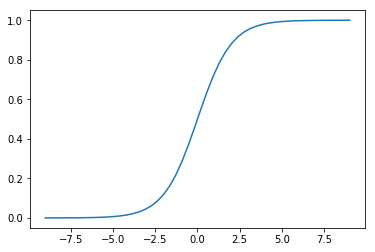

In [22]:
# Write your code here!

def sigmoid(n):
    return 1 / ( 1 + np.exp(-n) )

xx = np.linspace(start=-9 , stop = +9 )
yy = sigmoid(xx)

plt.plot(xx,yy)


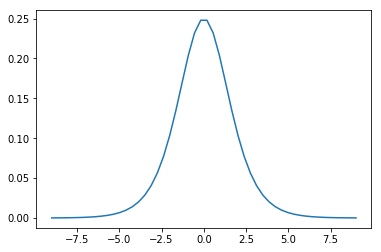

In [24]:
def sigmoid_derivative(n):
    return sigmoid(n) * ( 1 - sigmoid(n))


xx = np.linspace(start=-9 , stop = +9 )
yy = sigmoid_derivative(xx)

plt.plot(xx,yy)


### ReLU

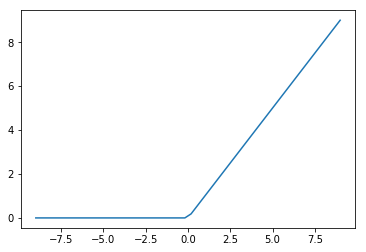

In [30]:
def relu(n):
    return n* (  n > 0 )

xx = np.linspace(start=-9 , stop = +9 )
yy = relu(xx)

plt.plot(xx,yy)

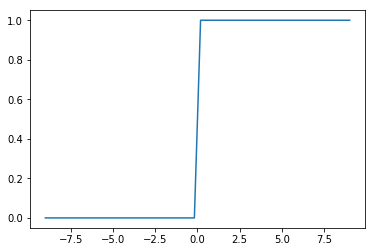

In [33]:
# Write your code here!

def relu_derivative(n):
    return  1 *( n >0 )  

xx = np.linspace(start=-9 , stop = +9 )
yy = relu_derivative(xx)

plt.plot(xx,yy)

## benchmark

In [40]:
%time tmp = [sigmoid(i) for i in range(10000)]
%time tmp = [sigmoid_derivative(i) for i in range(10000)]

CPU times: user 23.7 ms, sys: 1.41 ms, total: 25.1 ms
Wall time: 24.6 ms
CPU times: user 46.9 ms, sys: 1.4 ms, total: 48.3 ms
Wall time: 47.4 ms


In [41]:
%time tmp = [relu(i) for i in range(10000)]
%time tmp = [relu_derivative(i) for i in range(10000)]

CPU times: user 1.84 ms, sys: 8 µs, total: 1.85 ms
Wall time: 1.87 ms
CPU times: user 1.58 ms, sys: 8 µs, total: 1.58 ms
Wall time: 1.6 ms


## Train

In [44]:
import time

def train(X, y, y_hot, num_epoch, learning_rate, activation, activation_derivative):
    num_input = X.shape[1]
    num_output = y_hot.shape[1]

    w1 = np.random.uniform(low=-np.sqrt(6 / (num_input + 100)), high=np.sqrt(6 / (num_input + 100)), size=(num_input, 100))
    w2 = np.random.uniform(low=-np.sqrt(6 / (100 + 100)), high=np.sqrt(6 / (100 + 100)), size=(100, 100))
    w3 = np.random.uniform(low=-np.sqrt(6 / (100 + num_output)), high=np.sqrt(6 / (100 + 10)), size=(100, num_output))

    history = []

    start = time.time()

    for epoch in range(num_epoch):
        z1 = X.dot(w1)
        a1 = activation(z1)
        z2 = a1.dot(w2)
        a2 = activation(z2)
        z3 = a2.dot(w3)
        a3 = sigmoid(z3)

        y_predict = np.argmax(a3, axis=1)    
        error = (y != y_predict).mean()

        if epoch % 10 == 0:
            print("{0:2} error = {1:.5f}".format(epoch, error))

        end = time.time()
        history.append({
            'time': end - start,
            'error': error
        })

        d3 = a3 - y_hot
        d2 = d3.dot(w3.T) * activation_derivative(a2)
        d1 = d2.dot(w2.T) * activation_derivative(a1)

        w3 = w3 - learning_rate * a2.T.dot(d3)
        w2 = w2 - learning_rate * a1.T.dot(d2)
        w1 = w1 - learning_rate * X.T.dot(d1)

    end = time.time()
    elapsed = end - start

    return history, error, elapsed

### Sigmoid

In [62]:
# Write your code here!

num_epoch = 100
learning_rate = 0.0003 

sigmoid_history , error , elapsed = train(X,y,y_hot , num_epoch ,learning_rate, activation = sigmoid ,activation_derivative = sigmoid_derivative )


print("-----" * 10) 
print("[sigmoid] elapsed = {0:.2f} seconds ,error = {1:.5f}".format( elapsed, error))


 0 error = 0.90095
10 error = 0.30273
20 error = 0.26099
30 error = 0.25209
40 error = 0.24875
50 error = 0.20701
60 error = 0.16861
70 error = 0.14747
80 error = 0.13912
90 error = 0.13801
--------------------------------------------------
[sigmoid] elapsed = 1.78 seconds ,error = 0.13801


### ReLU

In [10]:
# Write your code here!

In [63]:
# Write your code here!

num_epoch = 100
learning_rate = 0.00001

relu_history , error , elapsed = train(X,y,y_hot , num_epoch ,learning_rate, activation = relu ,activation_derivative = relu_derivative )


print("-----" * 10) 
print("[relu] elapsed = {0:.2f} seconds ,error = {1:.5f}".format( elapsed, error))


 0 error = 0.90150
10 error = 0.30662
20 error = 0.15415
30 error = 0.10796
40 error = 0.08459
50 error = 0.06678
60 error = 0.05509
70 error = 0.04730
80 error = 0.04007
90 error = 0.03450
--------------------------------------------------
[relu] elapsed = 0.75 seconds ,error = 0.02838


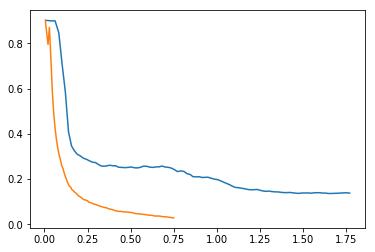

In [64]:
import pandas as pd 

sigmoid_history = pd.DataFrame(sigmoid_history)
relu_history    = pd.DataFrame(relu_history)

plt.plot(sigmoid_history['time'],sigmoid_history['error'],label = 'sigmoid' )
plt.plot(relu_history['time'],relu_history['error'],label = 'relu' )
